## Business Understanding

## Data Understanding


In [212]:
import pandas as pd
pd.set_option('display.max_rows',500)

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv" 

In [214]:
df_basic=pd.read_csv(url)

In [215]:
df_basic

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197460,ZWE,Africa,Zimbabwe,2022-06-24,255309.0,173.0,79.429,5549.0,7.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197461,ZWE,Africa,Zimbabwe,2022-06-25,255309.0,0.0,79.429,5549.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197462,ZWE,Africa,Zimbabwe,2022-06-26,255355.0,46.0,79.143,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197463,ZWE,Africa,Zimbabwe,2022-06-27,255383.0,28.0,78.857,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [216]:
df_basic.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [217]:
df_basic['location']

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
197460       Zimbabwe
197461       Zimbabwe
197462       Zimbabwe
197463       Zimbabwe
197464       Zimbabwe
Name: location, Length: 197465, dtype: object

In [219]:
ind=df_basic['location']=='Indonesia'       ## Selecting the countries of choice
vie=df_basic['location']=='Vietnam'
isr=df_basic['location']=='Israel'

a=ind|vie|isr
df_intermediate=df_basic[a]
df_intermediate=df_intermediate.reset_index(drop=True)


In [220]:
df_intermediate

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
1,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
2,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
3,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
4,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,VNM,Asia,Vietnam,2022-06-24,10742234.0,1639.0,832.286,43084.0,0.0,0.143,...,1.0,45.9,85.847,2.60,75.40,0.704,NaN,NaN,NaN,NaN
2593,VNM,Asia,Vietnam,2022-06-25,10742891.0,657.0,826.286,43084.0,0.0,0.143,...,1.0,45.9,85.847,2.60,75.40,0.704,NaN,NaN,NaN,NaN
2594,VNM,Asia,Vietnam,2022-06-26,10743448.0,557.0,829.714,43084.0,0.0,0.143,...,1.0,45.9,85.847,2.60,75.40,0.704,NaN,NaN,NaN,NaN
2595,VNM,Asia,Vietnam,2022-06-27,10744085.0,637.0,846.286,43084.0,0.0,0.143,...,1.0,45.9,85.847,2.60,75.40,0.704,NaN,NaN,NaN,NaN


<AxesSubplot:>

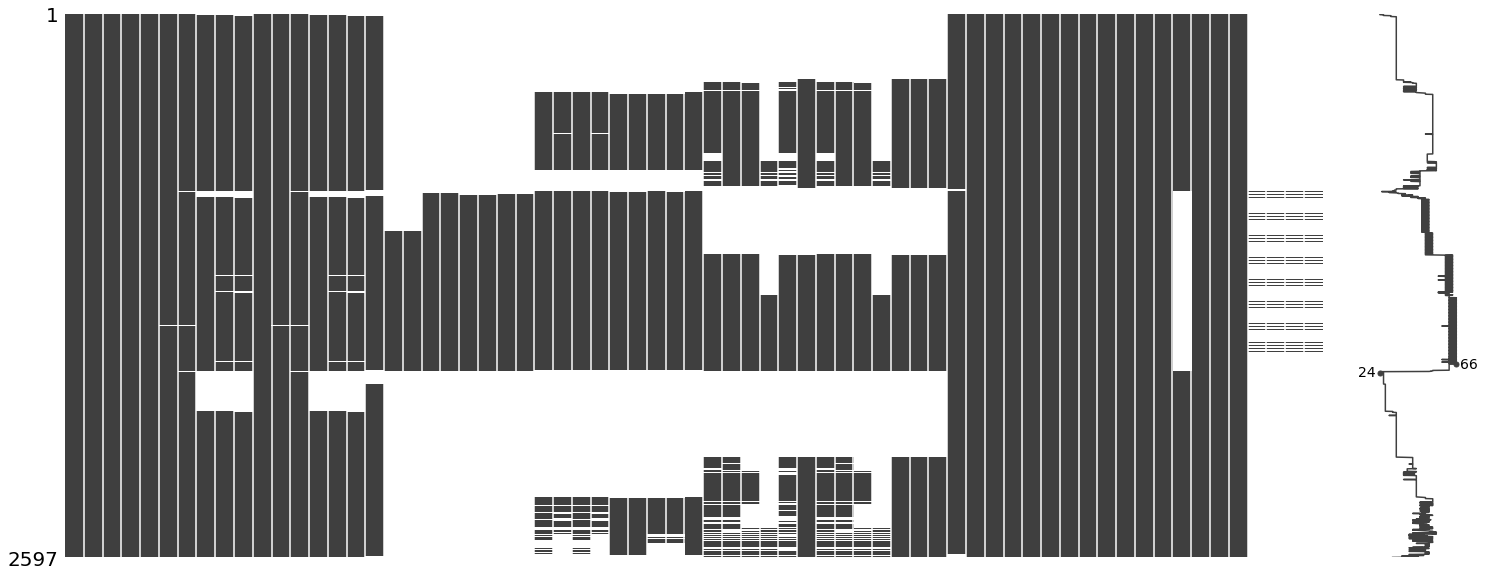

In [221]:
import missingno as msno

msno.matrix(df_intermediate)



In [222]:
df_intermediate.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:>

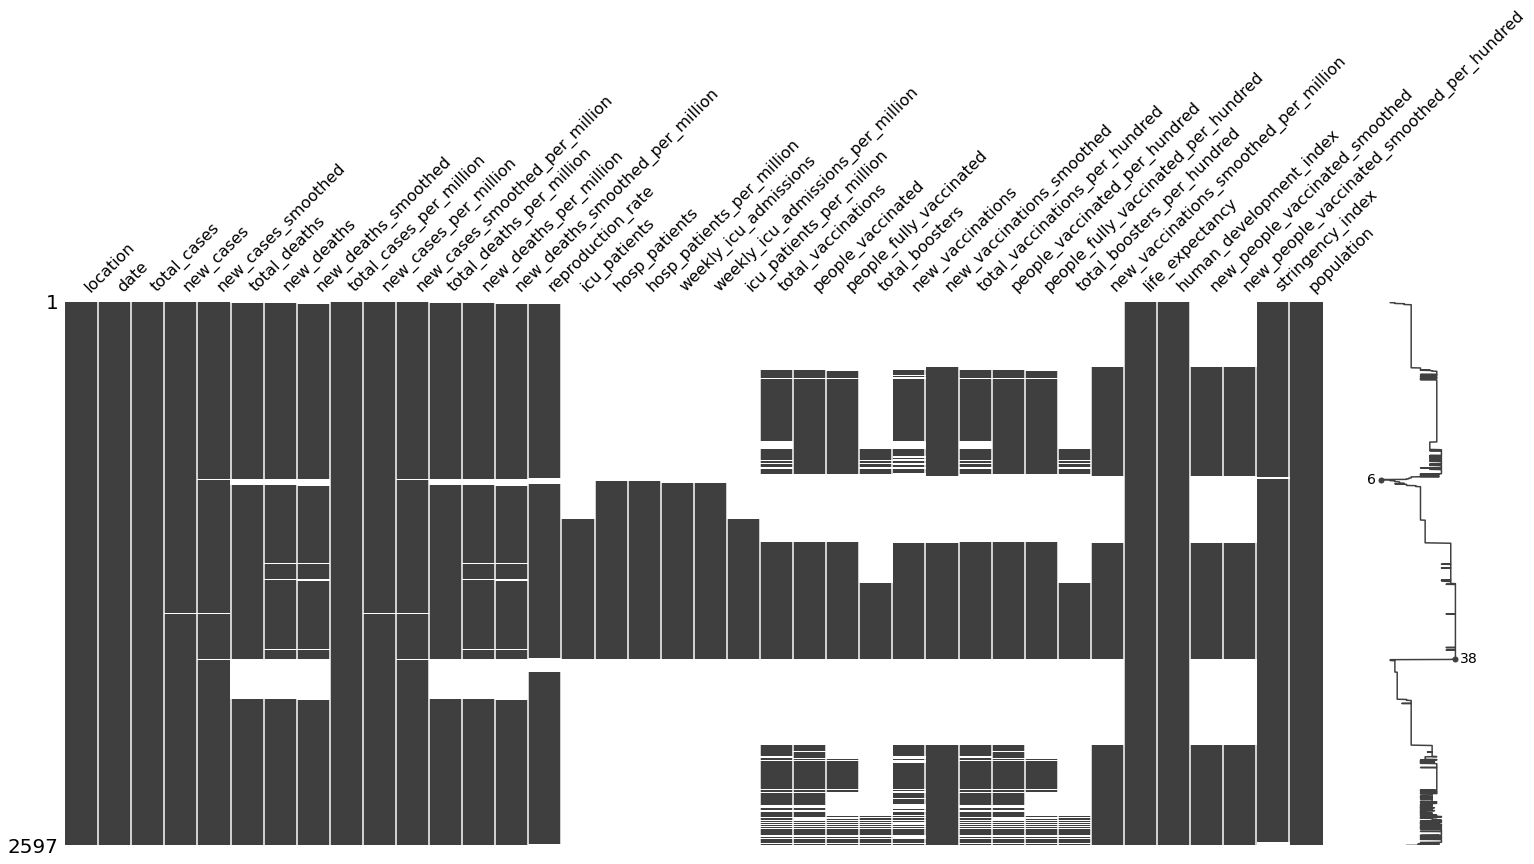

In [223]:
msno.matrix(df_intermediate[['location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million',
       'icu_patients_per_million', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'life_expectancy', 'human_development_index',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population'
]])

## Plotting the Data

In [229]:
import plotly.express as p

fig = px.line(df_intermediate, x="date", y="total_cases", color='location', title='Total Number of Covid Cases')


In [225]:
df_intermediate['cases_normalized']=df_intermediate['total_cases']/df_intermediate['population']

fig = px.line(df_intermediate, x="date", y="cases_normalized", color='location', title='Normalized Number of Covid Cases')
fig.show()

In [230]:
fig = px.line(df_intermediate, x="date", y="people_vaccinated", color='location', title='Number of People Vaccinated')


In [227]:
df_intermediate['people_vaccinated_normalized']=df_intermediate['people_vaccinated']/df_intermediate['population']


In [231]:

fig = px.line(df_intermediate, x="date", y="people_vaccinated_normalized", color='location', title='Normalized People Vaccinated')
fig.show()